In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import cv2
from tqdm import tqdm_notebook as tqdm

In [0]:
# path : /content/gdrive/My Drive/Datasets/Landscapes 
path = "/content/gdrive/My Drive/Datasets/Landscapes_snapshots"

In [0]:
%%capture
image_list = []
import os
for dirname, _, filename in os.walk(path) :
  for files in tqdm(filename) :
    i =  os.path.join(dirname, files)
    print(i)
    if i.endswith(".jpg") :
      image_list.append(i)

In [7]:
len(image_list)

4329

In [0]:
def load_image(image_path) : 
  image = cv2.imread(image_path) 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

def convert_gray(image) : 
  return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def plot_image(image) : 
  plt.figure(figsize = (20, 12))
  plt.imshow(image, cmap = "gray")
  plt.grid(False)

def resize(image, shape) : 
  image = cv2.resize(image, (shape[0], shape[1]), interpolation = cv2.INTER_AREA)
  return image

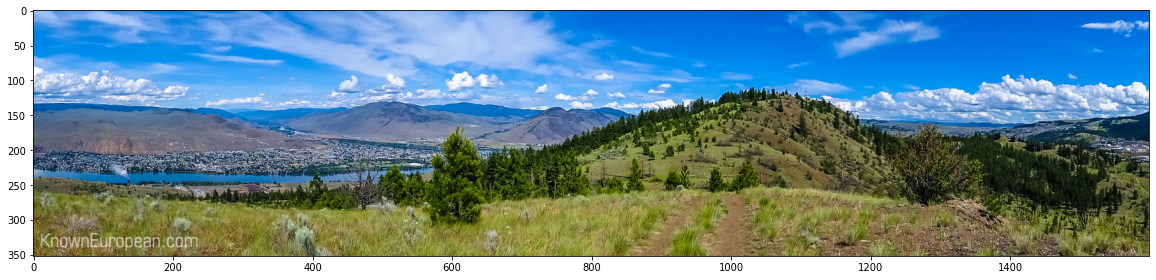

In [9]:
sample_image = load_image(image_list[1])
plot_image(sample_image)

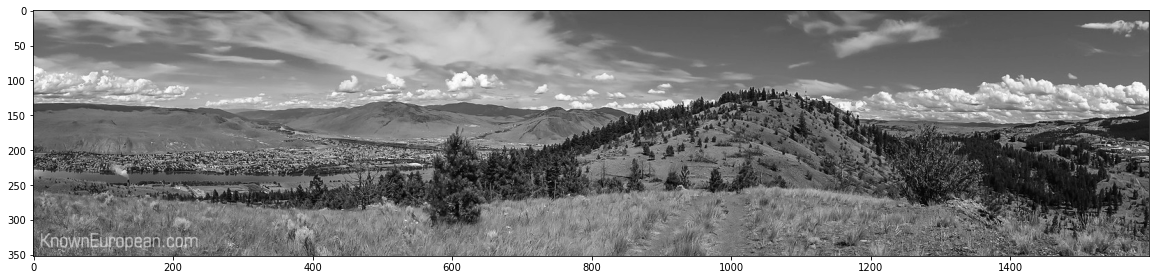

In [10]:
grayed = convert_gray(sample_image)
plot_image(grayed)

In [0]:
red, green, blue = [], [], []

In [12]:
for image_path in tqdm(image_list) :
  image = load_image(image_path)
  
  mean_red = np.mean(image[:,:,0])
  mean_green = np.mean(image[:,:,1])
  mean_blue = np.mean(image[:,:,2])
  
  red.append(mean_red)
  green.append(mean_green)
  blue.append(mean_blue)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [13]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


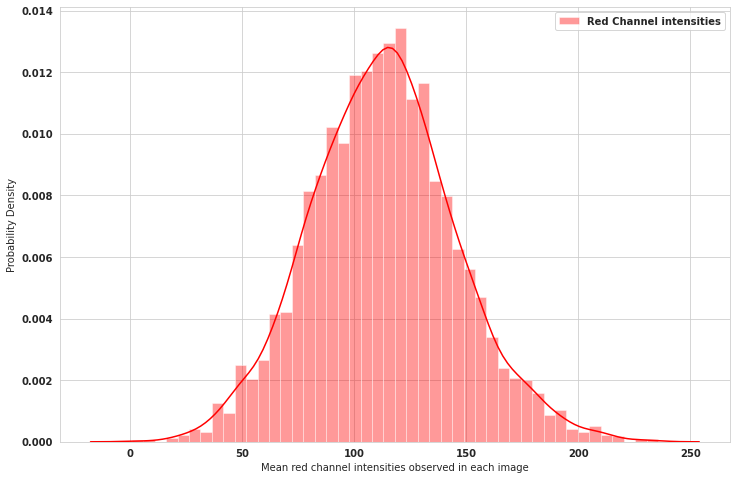

In [14]:
# Red channel plot
plt.figure(figsize = (12, 8))
plt.rc('font', weight='bold')
sns.set_style("whitegrid")
fig = sns.distplot(red,  hist = True, kde = True, label = "Red Channel intensities", color = "r")
fig.set(xlabel = "Mean red channel intensities observed in each image", ylabel = "Probability Density")
plt.legend()

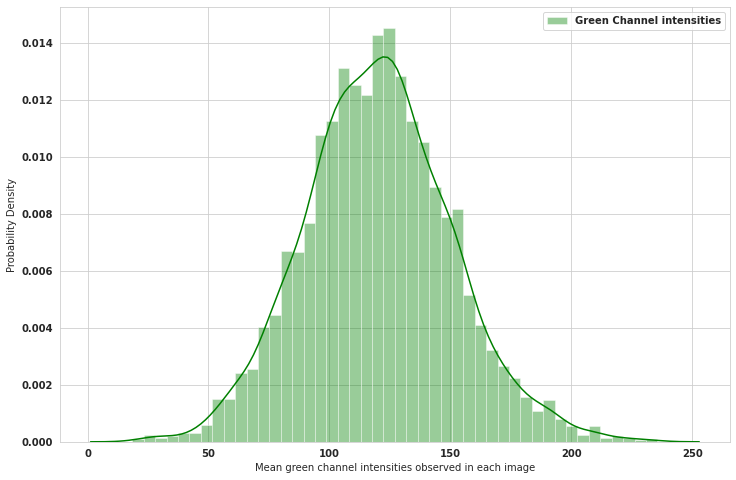

In [15]:
# Green channel plot
plt.figure(figsize = (12, 8))
plt.rc('font', weight='bold')
sns.set_style("whitegrid")
fig = sns.distplot(green,  hist = True, kde = True, label = "Green Channel intensities", color = "g")
fig.set(xlabel = "Mean green channel intensities observed in each image", ylabel = "Probability Density")
plt.legend()

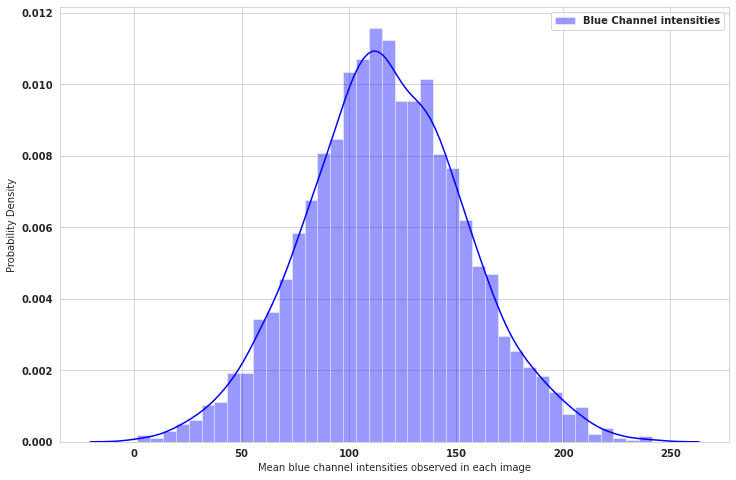

In [16]:
# Blue channel plot
plt.figure(figsize = (12, 8))
plt.rc('font', weight='bold')
sns.set_style("whitegrid")
fig = sns.distplot(blue,  hist = True, kde = True, rug = False, label = "Blue Channel intensities", color = "b")
fig.set(xlabel = "Mean blue channel intensities observed in each image", ylabel = "Probability Density")
plt.legend()

In [0]:
IMAGE_SIZE = (300, 300)
BATCH_SIZE = 32
SPLIT_FACTOR = 0.85
EPOCHS = 100 

In [18]:
grayed_images = []
target_images = []
for image_path in tqdm(image_list):
    image = load_image(image_path)
    image = resize(image, (IMAGE_SIZE[0], IMAGE_SIZE[1])) 
    grayed = convert_gray(image)    
    grayed_images.append(grayed)
    target_images.append(image)

grayed_images = np.ndarray(shape = (len(grayed_images), IMAGE_SIZE[0], IMAGE_SIZE[1], 1), dtype = np.float32)
grayed_images = grayed_images/255.0

target_images = np.ndarray(shape = (len(target_images), IMAGE_SIZE[0], IMAGE_SIZE[1], 3), dtype = np.float32)
target_images = target_images/255.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [19]:
grayed_images.shape

(4329, 300, 300, 1)

In [20]:
target_images.shape

(4329, 300, 300, 3)

In [0]:
def prepare_dataset(split_factor) : 
  x_train, y_train = grayed_images[0:int(len(grayed_images) * split_factor)], target_images[0:int(len(target_images) * split_factor)]
  x_val, y_val = grayed_images[int(len(grayed_images) * split_factor) : ] , target_images[int(len(target_images) * split_factor) :]
  return x_train, y_train, x_val, y_val

In [0]:
x_train, y_train, x_val, y_val = prepare_dataset(SPLIT_FACTOR)

In [35]:
print("Shape of training set = ",x_train.shape, y_train.shape)
print("Shape of validation set = ",x_val.shape, y_val.shape)

Shape of training set =  (3679, 300, 300, 1) (3679, 300, 300, 3)
Shape of validation set =  (650, 300, 300, 1) (650, 300, 300, 3)


# Deep Learning Architecture - AutoEncoder 

In [0]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor= "val_loss", factor = 0.5, patience = 10,
                                                 min_lr = 0.000001, verbose = 1)
monitor_es = tf.keras.callbacks.EarlyStopping(monitor= " val_loss", patience = 25, restore_best_weights= False, verbose = True)

In [43]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size= 3, padding = "same", activation= "relu", input_shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], 1)))
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu", strides= 2))
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size= 3, padding = "same", activation= "relu"))
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size= 3, padding = "same", activation= "relu", strides = 2))
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size= 3, padding = "same", activation= "relu"))
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size= 3, padding = "same", activation= "relu"))

model.add(tf.keras.layers.UpSampling2D(size = (2,2)))
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size= 3, padding = "same", activation= "relu"))
model.add(tf.keras.layers.UpSampling2D(size = (2,2)))
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size= 3, padding = "same", activation= "relu"))
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size= 3, padding = "same", activation= "relu"))
model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size= 3, padding = "same", activation= "relu"))
model.add(tf.keras.layers.Conv2D(filters = 3, kernel_size= 3, padding = "same", activation= "relu"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 300, 300, 64)      640       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 75, 75, 32)        18464     
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
up_sampling2d_8 (UpSampling2 (None, 150, 150, 32)     

In [0]:
model.compile(optimizer= tf.keras.optimizers.Adam(lr = 0.001), loss = "MSE")

In [46]:
with tf.device("/device:GPU:0"):
  history = model.fit(x_train, y_train, validation_data= (x_val, y_val), epochs = EPOCHS, verbose = 1, batch_size= BATCH_SIZE, 
                      steps_per_epoch = np.ceil((len(x_train) / BATCH_SIZE))) 

Epoch 1/100
 57/115 [=============>................] - ETA: 1:03 - loss: inf

KeyboardInterrupt: ignored

In [0]:
plt.figure(1, figsize = (20, 12))
plt.subplot(121)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(epochs, history.history["loss"], label = "Training Loss")
plt.plot(epochs, history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

In [0]:
model.save("imageColourization_auto_encoder.h5")